# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Первым, что бросается в глаза - большое количество столбцов. Достаточно много столбцов, в которых имеются пропущенные значения.

Каждый столбец, в котором есть пропущенные значения, требует индивидуальный подход, так как не всегда уместно можно заменить пропуски. 

Говоря о типе данных, будет необходимо заменить на целочисленные значения в столбцах: last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_nearest, days_exposition.





### Шаг 2. Предобработка данных

In [5]:
# Посмотрим количество пропусков (NaN)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Разберем каждый столбец 

# столбец balcony:
#data['balcony'].value_counts()
# Заменим их на нули
data['balcony'] = data['balcony'].fillna(0)
# Поменяем тип данных, так как нам не нужны количество балконов с точностью до знаков после запятой
data['balcony'] = data['balcony'].astype('int')
# Проверим проведенные операции 
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

In [7]:
# столбец is_apartament 
#data['is_apartment'].unique()
# данный столбец должен иметь тип данных bool (True and False), однако пропущенные значения всё портят
# исправим это - предложим логическую замену: если человек не указал информацию в этом столбце,
# то приходит мысль о том, что это не апартаменты, поэтому заменим значения nan на false
data['is_apartment'] = data['is_apartment'].fillna(0)
# Так как все ненулевые значения имеют значения либо true, либо false, поэтому сменим тип данных на bool
# тем самым пропуски заменятьсян на false
data['is_apartment'] = data['is_apartment'].astype('bool')
# Проверим
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [8]:
# cтолбец airports_nearest
#data['airports_nearest'].value_counts()
# вероятно, что пропущенные значения соответствуют тому, что до аэропорта далеко добираться, так как данные получены автоматически
# Для сохранения данных и наглядности произведем замену на невозможное значение
data['airports_nearest'] = data['airports_nearest'].fillna(-9999)
# Поменяем тип данных, так как размерность каждого значения в этом столбце - метр. Точнее этой размерности нам знать не нужно.
data['airports_nearest'] = data['airports_nearest'].astype('int')
# Проверим замену 
data['airports_nearest'].value_counts()

-9999     5542
 37434      61
 21928      32
 39946      30
 44870      30
          ... 
 41275       1
 12990       1
 35529       1
 9843        1
 0           1
Name: airports_nearest, Length: 8276, dtype: int64

In [9]:
# столбец cityCenters_nearest
#data['cityCenters_nearest'].value_counts()
# вероятно, что пропущенные значения соответствуют тому, что до центра города далеко добираться, так как данные получены автоматически
# Для сохранения данных и наглядности произведем замену на невозможное значение
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-9999)
# Поменяем тип данных, так как размерность каждого значения в этом столбце - метр. Точнее этой размерности нам знать не нужно.
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
# Проверим замену 
data['cityCenters_nearest'].value_counts()

-9999     5519
 8460       61
 20802      32
 10720      30
 8434       27
          ... 
 3689        1
 5738        1
 15983       1
 3558        1
 32768       1
Name: cityCenters_nearest, Length: 7643, dtype: int64

In [10]:
# столбец parks_nearest
#data['parks_nearest'].value_counts()
# вероятно, что пропущенные значения соответствуют тому, что до парка далеко добираться, так как данные получены автоматически
# Для сохранения данных и наглядности произведем замену на невозможное значение
data['parks_nearest'] = data['parks_nearest'].fillna(-9999)
# Поменяем тип данных, так как размерность каждого значения в этом столбце - метр. Точнее этой размерности нам знать не нужно.
data['parks_nearest'] = data['parks_nearest'].astype('int')
# Проверим замену 
data['parks_nearest'].value_counts()

-9999    15620
 441        67
 173        41
 392        41
 456        40
         ...  
 828         1
 1443        1
 2768        1
 956         1
 2905        1
Name: parks_nearest, Length: 996, dtype: int64

In [11]:
# столбец ponds_nearest
#data['ponds_nearest'].value_counts()
# вероятно, что пропущенные значения соответствуют тому, что до пруда далеко добираться, так как данные получены автоматически
# Для сохранения данных и наглядности произведем замену на невозможное значение
data['ponds_nearest'] = data['ponds_nearest'].fillna(-9999)
# Поменяем тип данных, так как размерность каждого значения в этом столбце - метр. Точнее этой размерности нам знать не нужно.
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
# Проверим замену 
data['parks_nearest'].value_counts()

-9999    15620
 441        67
 173        41
 392        41
 456        40
         ...  
 828         1
 1443        1
 2768        1
 956         1
 2905        1
Name: parks_nearest, Length: 996, dtype: int64

In [12]:
# столбец parks_around3000
#data['parks_around3000'].value_counts()
# Похожая история была с балконами - если отсутствует информация, то можно предположить, что парков рядом нет,
# то есть в численной форме равно 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# Столбец включает в себя количество парков, то есть рациональнее использовать целочисленные значения 
data['parks_around3000'] = data['parks_around3000'].astype('int')
# Проверим замену 
data['parks_around3000'].value_counts()

0    15624
1     5681
2     1747
3      647
Name: parks_around3000, dtype: int64

In [13]:
# столбец ponds_around3000
# такая же история как и с парками
#data['ponds_around3000'].value_counts()
# Похожая история была с балконами - если отсутствует информация, то можно предположить, что прудов рядом нет,
# то есть в численной форме равно 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# Так как столбец включает в себя количество прудов, то логичнее использовать целочисленные значения
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
# Проверим замену 
data['ponds_around3000'].value_counts()

0    14589
1     5717
2     1892
3     1501
Name: ponds_around3000, dtype: int64

In [14]:
# столбец days_exposition 
#data['days_exposition'].value_counts()
# данные значения показывают сколько объявление было размещено до момента снятия 
# одним из вариантов замены пропущенных значений является замена на ноль, что будет означать, что объявление ещё не снято
data['days_exposition'] = data['days_exposition'].fillna(-9999)
# Поменяем тип данных для данного столбца (нам интересно только целое количество дней)
data['days_exposition'] = data['days_exposition'].astype('int')
# Проверим замену
data['days_exposition'].value_counts()

-9999    3181
 45       880
 60       538
 7        234
 30       208
         ... 
 807        1
 871        1
 951        1
 999        1
 1175       1
Name: days_exposition, Length: 1142, dtype: int64

In [15]:
# столбец living_area
#data['living_area'].value_counts()
# в данном столбце возможна замену пропущенных значений по следующему принципу: 
# распространенной практикой является выкуп квартир под магазины/салоны красоты и тому подобное
# поэтому все пропущенные значения будем считать именно такими случаями и приравнивать их к нулям
data['living_area'] = data['living_area'].fillna(0)
# Уберем лишние знаки после запятой
data['living_area'] = round(data['living_area'], 1)
# Проверим замену
data['living_area'].value_counts()

0.0      1903
18.0      888
17.0      684
30.0      603
16.0      488
         ... 
160.1       1
184.9       1
121.6       1
179.0       1
62.2        1
Name: living_area, Length: 1030, dtype: int64

In [16]:
# столбец kitchen_area
#data['kitchen_area'].value_counts()
# в данном случае возможен такой вариант, что пропуски = отсутствию кухни 
data['kitchen_area'] = data['kitchen_area'].fillna(0)
# Уберем лишние знаки после запятой
data['kitchen_area'] = round(data['kitchen_area'], 1)
# Проверим замену
data['kitchen_area'].value_counts()

0.0     2278
6.0     1302
10.0    1280
8.0     1118
9.0     1109
        ... 
25.5       1
47.0       1
37.6       1
24.8       1
62.0       1
Name: kitchen_area, Length: 399, dtype: int64

In [17]:
# Проверим размерность таблицы
data.shape

(23699, 22)

In [18]:
# столбец locality_name
# в данном случае замена пропусков является проблемой, так как по тем данным, которые у нас имеются,
# невозможно определить локацию квартиры, необходимо обратиться к поставщикам данных.
#data['locality_name'].unique()
# уберем значения, которые в данном ситуации невозможно заполнить
data = data.dropna(subset = ['locality_name'])
#data['locality_name'].unique()
data.shape

(23650, 22)

In [19]:
# в столбце ceiling_height сложно заменить пропуски, так как высота потолка может быть сильно разниться от дома к дому
# Замена пропусков на ноль будет неверным решением, необходимо обратиться к поставщикам данных.

# В предыдущей версии проекта было удаление строк с пропусками в данном столбце
# Однако операция удаления приводит к потери большей части данных, 
# поэтому заменим на невозможное значение высоты (например, любое отрицательное число)
data['ceiling_height'] = data['ceiling_height'].fillna(-9999)

data.shape

(23650, 22)

In [20]:
# в столбце floors_total тоже проблематично заменить пропуски,
# так как сложно предположить сколько этажей в доме по тем данным, которые у нас есть
# единственное, что можно сделать - вычислить возможное (минимальное) количество этажей по данным floor

# заменим на несуществующее значение пропуски и поменяем тип данных на целочисленный 
data['floors_total'] = data['floors_total'].fillna(-9999)
data['floors_total'] = data['floors_total'].astype('int')
data.shape

(23650, 22)

In [21]:
# Поменяем тип данных в столбце last_price, при ценах на недвижимость нас интересуют только целочисленные значения 
data['last_price'] = data['last_price'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,-9999
1,7,3350000,40.4,2018-12-04T00:00:00,1,-9999.00,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817,18603,0,-9999,0,-9999,81
2,10,5196000,56.0,2015-08-20T00:00:00,2,-9999.00,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24T00:00:00,3,-9999.00,14,0.0,9,False,...,0.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


In [22]:
# Проверим количество пропусков
data.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null int64
cityCenters_nearest     23650 non-null int64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around3000        23650

**Вывод**
<ul>
    Большинство пропусков удалось обработать в этом шаге, однако осталось 3 столбца (locality_name, ceiling_height, floors_total), в которых заполнить пропуски невозможно из-за недостаточности данных. Необходимо обратиться к поставщикам данных.
</ul>
    

### Шаг 3. Посчитайте и добавьте в таблицу

In [24]:
# расчет цены квадратного метра
# для расчет цены квадратного метра необходимо поделить стоимость квартиры (last_price) на суммарную площадь квартиы (total_area)
data['price_square_meter'] = data['last_price'] / data['total_area']

# Поменяем тип данных 
data['price_square_meter'] = data['price_square_meter'].astype('int')
# Проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,-9999,120370
1,7,3350000,40.4,2018-12-04T00:00:00,1,-9999.00,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,-9999,0,-9999,81,82920
2,10,5196000,56.0,2015-08-20T00:00:00,2,-9999.00,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785
3,0,64900000,159.0,2015-07-24T00:00:00,3,-9999.00,14,0.0,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


In [25]:
# добавление столбцов "день недели, месяц и год публикации объявления"
data['exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['weekday_exposition'] = data['exposition'].dt.weekday
data['month_exposition'] = data['exposition'].dt.month
data['year_exposition'] = data['exposition'].dt.year
# проверим %Y-%m-%d
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,exposition,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,1,482,2,755,-9999,120370,2019-03-07,3,3,2019
1,7,3350000,40.4,2018-12-04T00:00:00,1,-9999.00,11,18.6,1,False,...,0,-9999,0,-9999,81,82920,2018-12-04,1,12,2018
2,10,5196000,56.0,2015-08-20T00:00:00,2,-9999.00,5,34.3,4,False,...,1,90,2,574,558,92785,2015-08-20,3,8,2015
3,0,64900000,159.0,2015-07-24T00:00:00,3,-9999.00,14,0.0,9,False,...,2,84,3,234,424,408176,2015-07-24,4,7,2015
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,2,112,1,48,121,100000,2018-06-19,1,6,2018


In [26]:
# добавление столбца "этаж квартиры; варианты — первый, последний, другой"

# создадим функцию, которая будет категоризировать данные 
def floor_category(floor, floors_total):
    if floor == floors_total:
        return 'last_floor'
    if floor == 1:
        return 'first_floor'
    return 'another_floor'
#print(floor_category(2, 16))
# Добавим столбец в data 
data['floor_category'] = data.apply(lambda x: floor_category(x.floor, x.floors_total), axis = 1)
# Проверим 
data['floor_category'].value_counts()

another_floor    17408
last_floor        3355
first_floor       2887
Name: floor_category, dtype: int64

In [27]:
# добавление столбца "соотношение жилой и общей площади" 
data['ratio_living_area'] = data['living_area'] / data['total_area']
# Округлим до 2 знаков после запятой 
data['ratio_living_area'] = round(data['ratio_living_area'], 2)
# Проверим добавление столбца
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,exposition,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_living_area
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,2,755,-9999,120370,2019-03-07,3,3,2019,another_floor,0.47
1,7,3350000,40.4,2018-12-04T00:00:00,1,-9999.00,11,18.6,1,False,...,0,-9999,81,82920,2018-12-04,1,12,2018,first_floor,0.46
2,10,5196000,56.0,2015-08-20T00:00:00,2,-9999.00,5,34.3,4,False,...,2,574,558,92785,2015-08-20,3,8,2015,another_floor,0.61
3,0,64900000,159.0,2015-07-24T00:00:00,3,-9999.00,14,0.0,9,False,...,3,234,424,408176,2015-07-24,4,7,2015,another_floor,0.00
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,1,48,121,100000,2018-06-19,1,6,2018,another_floor,0.32


In [28]:
# добавление столбца "отношение площади кухни к общей"
data['ration_kitchen_area'] = data['kitchen_area'] / data['total_area']
# Округлим до 2 знаков после запятой
data['ration_kitchen_area'] = round(data['ration_kitchen_area'], 2)
# Проверим добавление столбца
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_square_meter,exposition,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_living_area,ration_kitchen_area
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,755,-9999,120370,2019-03-07,3,3,2019,another_floor,0.47,0.23
1,7,3350000,40.4,2018-12-04T00:00:00,1,-9999.00,11,18.6,1,False,...,-9999,81,82920,2018-12-04,1,12,2018,first_floor,0.46,0.27
2,10,5196000,56.0,2015-08-20T00:00:00,2,-9999.00,5,34.3,4,False,...,574,558,92785,2015-08-20,3,8,2015,another_floor,0.61,0.15
3,0,64900000,159.0,2015-07-24T00:00:00,3,-9999.00,14,0.0,9,False,...,234,424,408176,2015-07-24,4,7,2015,another_floor,0.00,0.00
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,48,121,100000,2018-06-19,1,6,2018,another_floor,0.32,0.41


**Вывод**
<ul>
    В таблицу были добавлены столбцы, обозначающие цену за квадратный метр, день недели, месяц и год публикации объявления, этаж квартиры(первый, последний и другой), соотношение жилой площади к общей и площади кухни к общей.
</ul>
    

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [29]:
# Создадим функцию, которая будет рисовать гистограммы: 
def hist(df, column, n, x_1, x_2, median, title, xlabel, ylabel):
    print(df[column].describe())
    plt.rcParams["figure.figsize"] = (10,7)
    ax = df[column].hist(bins=n, range = (x_1, x_2))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if median == 1:
        ax.axvline(df[column].median(), linestyle = '--',color = 'r')
    else:
            return ax

# Создадим функцию, которая будет рисовать графики: 
def plot(df, x_column_plot, y_column_plot, kind, alpha, grid, floor_price, line, x, title, xlabel, ylabel):
    if floor_price == 1:
        plt.rcParams["figure.figsize"] = (10,7)
        df.groupby(x_column_plot)[y_column_plot].max().plot(kind=kind)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    else:
        print(data[x_column_plot].corr(data[y_column_plot]))
        plt.rcParams["figure.figsize"] = (10,7)
        ax = df.plot(x= x_column_plot, y= y_column_plot, kind = kind, alpha= alpha,  grid= grid)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if line == 1:
            ax.axvline(x = x, linestyle = '--',color = 'r')

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


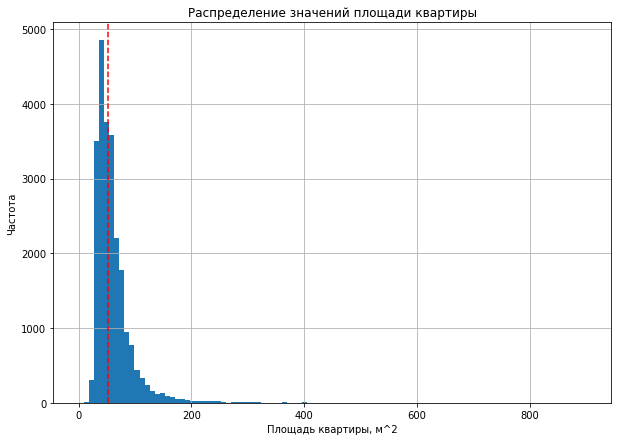

In [30]:
# Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
# Рассмотрим площадь
hist(data, 'total_area', 100, 0, 900, 1, 'Распределение значений площади квартиры', 'Площадь квартиры, м^2', 'Частота')
# Как видно - есть как минимум одно аномально большое значение (максимальное)
# по отношению медианы и среднего значения видно, что есть большие значения площадей, которые сдвигают вверх среднее значение

# Как видно из гистограммы - основная часть значений лежит до 200 квадратных метров, что вполне логично
# Квартиры бизнес-класса имеют площадь свыше 500 квадратных метров (бывают и 900)

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


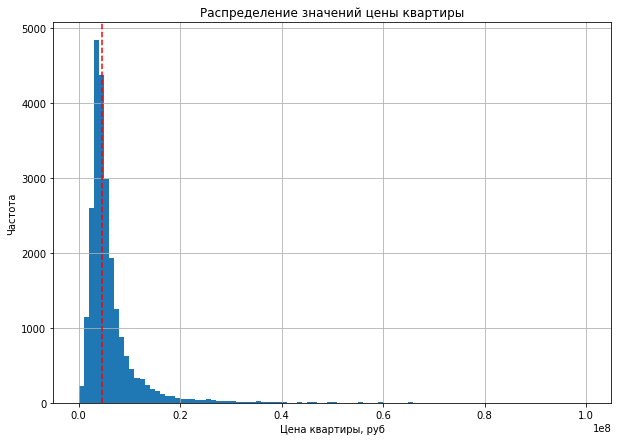

In [31]:
# Рассмотрим цену 
hist(data, 'last_price', 100, 0, 1e+08, 1, 'Распределение значений цены квартиры', 'Цена квартиры, руб', 'Частота')
# Можно предположить, что основная часть квартир стоит не более 10 миллионов, посмотрим внимательнее на гистограмме

# Дейтсвительно, основная часть находится в пределах до 10 миллионов, проверим как обстоят дела с минимальными значениями

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


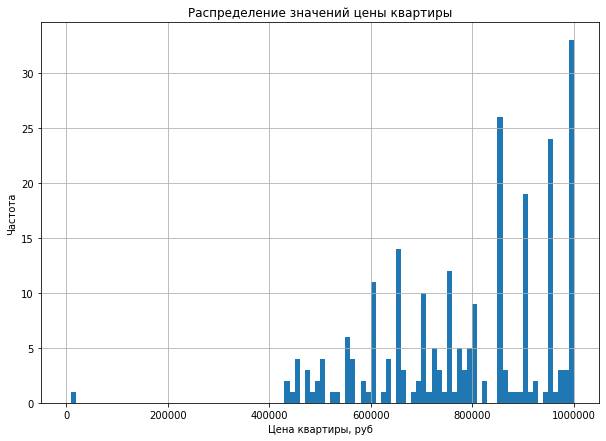

In [32]:
hist(data, 'last_price', 100, 0, 1e+06, 0, 'Распределение значений цены квартиры', 'Цена квартиры, руб', 'Частота')
# Есть очевидное значения, которое выпадает - близкое к нулю. 
# остальные значения (до миллиона) можно логически объяснить - квартиры находятся не в Петербурге, а в Ленинградской области
# по данным realty.yandex.ru такое вполне реально 

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


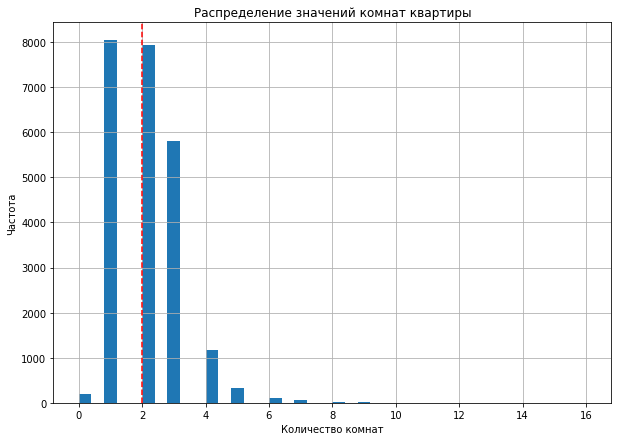

In [33]:
# гистограмма для числа комнат
hist(data, 'rooms', 40, 0, 16, 1, 'Распределение значений комнат квартиры', 'Количество комнат', 'Частота')
# В целом - квартели адекватные, однако есть и аномально больше - 19 комнат, продают дворец?:) 
# Видно, что основная часть приходится на одно-,двух- и трехкомнатные квартиры
# Есть нулевые значения комнат, которые необходимо в дальнейшем исключить (в любом случае - в квартире есть как минимум 1 комнта)

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


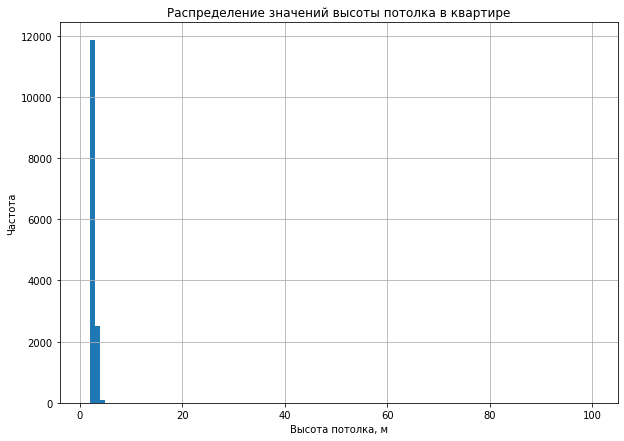

In [34]:
# Для анализа высоты потолка сохраним в отдельную таблицу срез данных, где высота потолка выше 0 м
data_for_ceiling = data.query('ceiling_height >=0')
# гистограмма для высоты потолков
hist(data_for_ceiling, 'ceiling_height', 100, 1, 100, 0, 'Распределение значений высоты потолка в квартире', 'Высота потолка, м', 'Частота')
# Вызывает подозрение максимальное значение, сложно представить квартиру со стометровыми потолками
# Нужно посмотреть много ли таких аномальных значений

# Видно, что многие значения - от 1 до 3, а то максимальное значение - скорее всего выброс

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


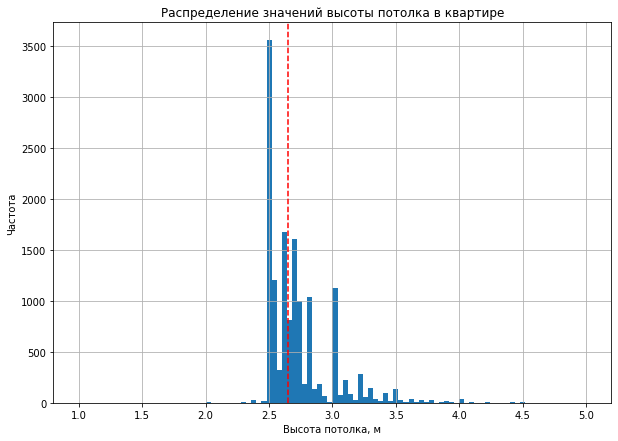

In [35]:
# для нагладности уменьшим range 
hist(data_for_ceiling, 'ceiling_height', 100, 1, 5, 1, 'Распределение значений высоты потолка в квартире', 'Высота потолка, м', 'Частота')
# основное количество значений хранится в интервале 2.5 - 3.0 метров, что вполне соответствует реальности 

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


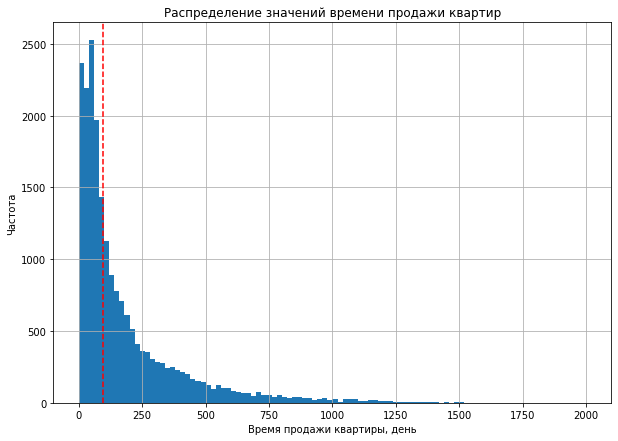

In [36]:
# Изучите время продажи квартиры. Постройте гистограмму. 

# Сделаем срез данных, чтобы изучить время продажи квартиры
data_for_days_exposition = data.query('days_exposition >= 0')

# Будем считать, что время от публикации до снятия объявления = время продажи квартиры (days_exposition)
hist(data_for_days_exposition, 'days_exposition', 100, 0, 2000, 1, 'Распределение значений времени продажи квартир','Время продажи квартиры, день', 'Частота')
# Среднее и медиана отличаются почти в 2 раза, максимальное значение приблизительно равно 4 годам (ну, а почему и нет?)

# Видно, что большая часть значений находится в интервале (0;250]
# что вполне соответствует правде 
# (по данным яндекс.недвижимости средний срок продажи соответствует 5-7 месяцев в зависимости от стратегии продажи)

In [37]:
# Посчитайте среднее и медиану

# Среднее и медиану уже было посчитано с помощью .describe()
# однако посчитаем отдельно, раз это требуется
median_days_exposition = data_for_days_exposition['days_exposition'].median()
mean_days_exposition = data_for_days_exposition['days_exposition'].mean()
median_days_exposition, mean_days_exposition
# Опишите, сколько обычно занимает продажа.

# Если отталкиваться от статистики яндекс.недвижимости по Санкт-Петербургу,
# то среднее значение наиболее адекватно вписывается в реальность
# Выкидывать значения, которые больше года (>365) тоже нельзя, ведь есть случаи, когда квартиры продают годами

(95.0, 180.7531998045921)

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


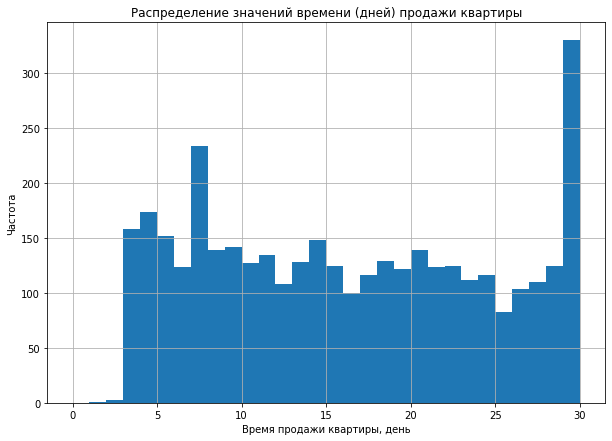

In [38]:
# Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

# продажи квартир считают быстрыми, если сделка закрыта за 2 недели-месяц 
# посмотрим, есть ли у нас такие случаи
hist(data_for_days_exposition, 'days_exposition', 30, 0, 30, 0, 'Распределение значений времени (дней) продажи квартиры','Время продажи квартиры, день', 'Частота') 
# начал с 0, чтобы было нагляднее сравнивать кол-во предложений
# как видно - таких значений не особо много, однако они присутствуют
# есть и совсем невероятные значения (3-5 дней) - возможно, что у этих значений следующая природа возникновения:
# человек решил продать квартиру по какой-то причине, но затем через несколько дней сложились так обстоятельства,
# что продажа уже неактуальна 
# (жизненные обстоятельства => передумал человек продавать квартиру; клиент отказался от покупки, но передумал через несколько дней)
# также возможен и вариант, что продавец хотел очень быстро продать квартиру и сильно снизил стоимость

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


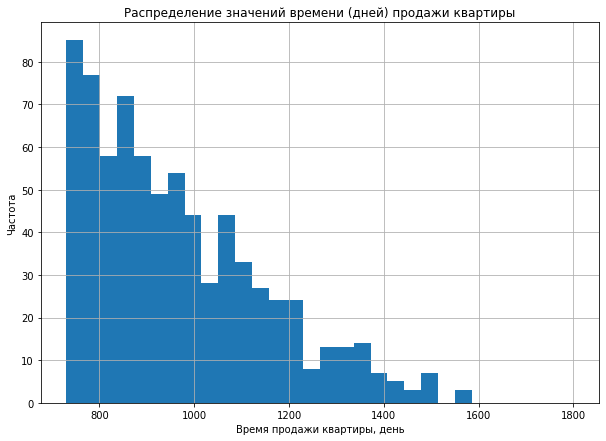

In [39]:
# Необычно долгий процесс продажи квартиры можно считать больше 24 месяцев
# так как лимитирующей стадией этого процесса является поиск покупателей, не всегда это происходит быстро
# посмотрим как много предложений, которые висят уже более 24 месяцев
hist(data_for_days_exposition, 'days_exposition', 30, 730, 1800, 0, 'Распределение значений времени (дней) продажи квартиры','Время продажи квартиры, день', 'Частота')
# быстрая продажа более вероятное событие, чем вот такая затяжная (более 18 месяцев)
# скорее всего, дело в психологии - хочется продать быстрее и не затягивать с этим, 
# поэтому после первых неудач в продаже люди потенциально готовы на уступки

In [40]:
# Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

# В столбце days_exposition необходимо убрать нулевые значения, значения, которые меньше быстрого срока продажи (14 дней)
# и значения, которые больше 24 месяцев 
data = data.query('14<= days_exposition <=730')

count    18096.000000
mean       163.718557
std        156.874828
min         14.000000
25%         48.000000
50%        103.000000
75%        224.000000
max        730.000000
Name: days_exposition, dtype: float64


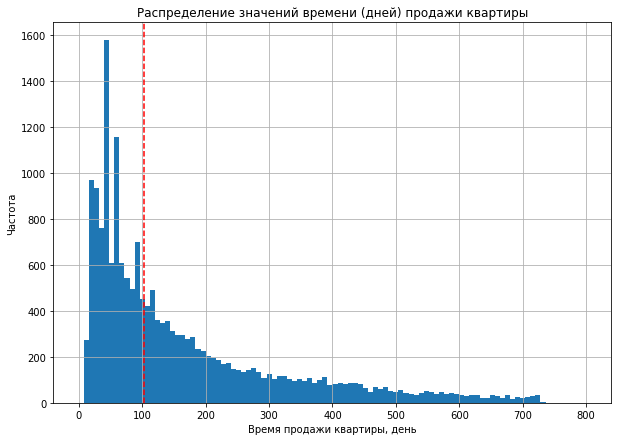

In [41]:
# Посмотрим как изменились квартели, поменялись значения среднего и медианы (медиана приблизилась к среднему)
hist(data, 'days_exposition', 100, 0, 800, 1, 'Распределение значений времени (дней) продажи квартиры','Время продажи квартиры, день', 'Частота')
# Гистограмма очень похожа на распределение Пуассона 

0.7386588612034451


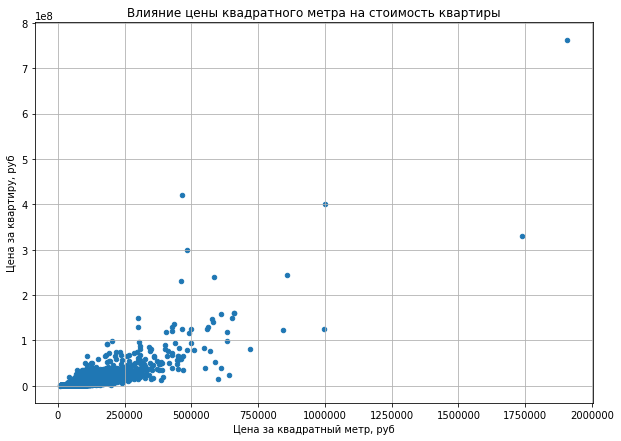

In [42]:
# Какие факторы больше всего влияют на стоимость квартиры?
# Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 

# Изучим зависимость цены от квадратого метра
# Для этого посчитаем корреляцию и построим график
plot(data, 'price_square_meter', 'last_price', 'scatter', 1, True, 0, 0, 0, 'Влияние цены квадратного метра на стоимость квартиры', 'Цена за квадратный метр, руб', 'Цена за квартиру, руб')
# Как видно из коэффициента корреляции и графика, зависимость между 2 параметрами есть - причем достаточно сильная 
# С увеличением цены за квадратный метр будет увеличиваться и суммарная стоимость квартиры, что вполне логично 

0.3498294088159013


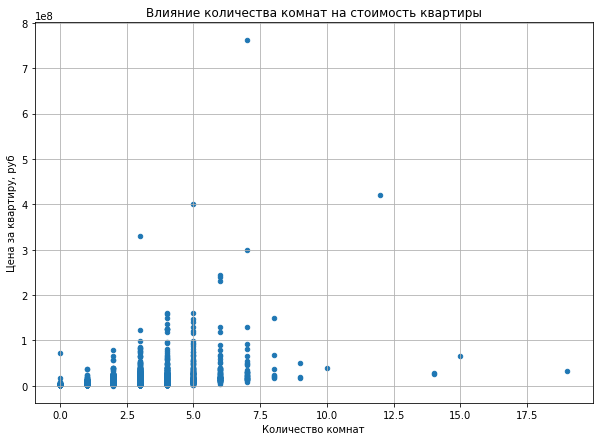

In [43]:
# Зависимость цены от числа комнат
# Для этого посчитаем корреляцию построим график
plot(data, 'rooms', 'last_price', 'scatter', 1, True, 0, 0, 0, 'Влияние количества комнат на стоимость квартиры', 'Количество комнат', 'Цена за квартиру, руб')
# Зависиимость есть, но неочевидная - по началу(с 1 по 4 rooms) проглядывается тенденция увеличения стоимости
# с увеличением числа комнат, после этого начинается небольшой спад
# вероятно, это связано с тем, что на стоимость квартиры влияет не только число комнат, но и ремонт/местоположение и другие удобства
# поэтому в целом - стоимость увеличивается, но зависит не только от количества комнат 

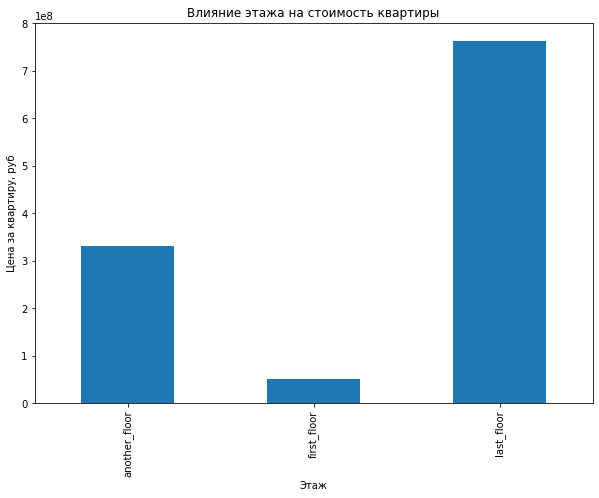

In [44]:
# Зависимость цены от этажа
# Для этого построим гистограмму
plot(data, 'floor_category', 'last_price', 'bar', 1, False, 1, 0, 0, 'Влияние этажа на стоимость квартиры', 'Этаж', 'Цена за квартиру, руб')

In [45]:
# Посчитаем корреляцию
data['last_price'].corr(data['floor'])
# Корреляция очень слабая, практически равна нулю 
# По теории это значит, что либо одна величина не зависит от другой (цена от этажа),
# либо зависимость имеет более сложный характер, чем линейный
# вероятно, что наш случай - второй, так как в реальности есть зависимости цены от этажа
# Как правило - самая низкая цена за 1 этаж, немного дороже - за последний, а самая высокая цена - за другие этажи
# Однако одновременно с этим влияют и другие факторы на стоимость (причем сильнее влияют), например, ремонт или геолокация.
# К тому же - по умолчанию считается корреляция Пирсона. Для категориальных величин необходимо использовать другой расчет.

0.030736785151383488

0.017034077676850817


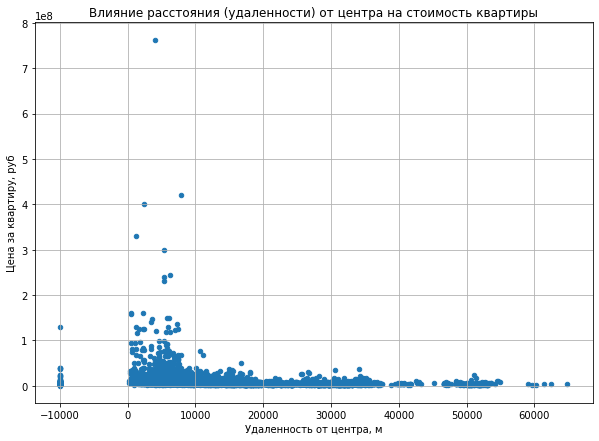

In [46]:
# Изучим зависимость цены от удалённости от центра
plot(data, 'cityCenters_nearest', 'last_price', 'scatter', 1, True, 0, 0, 0, 'Влияние расстояния (удаленности) от центра на стоимость квартиры', 'Удаленность от центра, м', 'Цена за квартиру, руб')
# Видно из графика и коэффициента корреляции, что с увеличением расстояния от центра цена падает
# Это достаточно известная ситуация (особенно для жителей крупных городов), однако не все так просто
# Цена зависит не только от удаленности от центра, но также и от состояния квартиры, этажа и т.д. 

0.003665108700806614


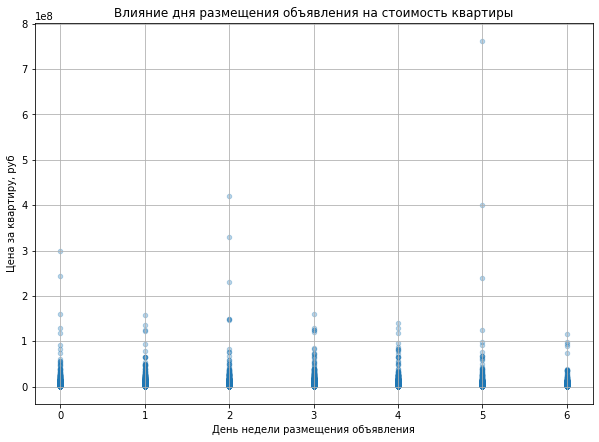

In [47]:
# Также изучите зависимость от даты размещения: дня недели, месяца и года.

# Изучим зависимость цены от дня недели размещения
# Построим график
plot(data, 'weekday_exposition', 'last_price', 'scatter', 0.3, True, 0, 0, 0, 'Влияние дня размещения объявления на стоимость квартиры', 'День недели размещения объявления', 'Цена за квартиру, руб')
# Корреляция очень слабая, однако можно заметить, что квартиры, выставленные в будни, дороже, чем в выходные
# С чем это может быть связано? Вопрос хороший, но однозначного ответа нет. 
# Возможно, это связано с тем, что люди выставляют квартиры в рабочие будни, 
# таким образом работа и стресс сказывается на ценнике
# а может быть - это случайность

In [48]:
data.groupby('weekday_exposition')['last_price'].mean()

weekday_exposition
0    6.172683e+06
1    6.100102e+06
2    6.395566e+06
3    6.291938e+06
4    5.975498e+06
5    7.070614e+06
6    5.903397e+06
Name: last_price, dtype: float64

0.004511498468279234


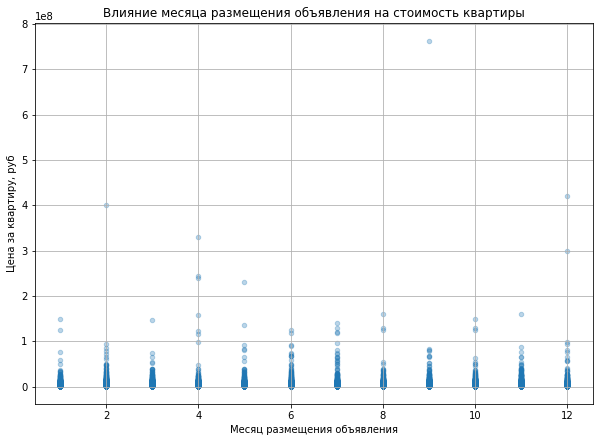

In [49]:
# Изучим зависимость цены от месяца размещения
# Построим график
plot(data, 'month_exposition', 'last_price', 'scatter', 0.3, True, 0, 0, 0, 'Влияние месяца размещения объявления на стоимость квартиры', 'Месяц размещения объявления', 'Цена за квартиру, руб')
# коэффициент корреляции близок к нулю
# скорее всего, дело в неоднозначной зависимости

In [50]:
data.groupby('month_exposition')['last_price'].mean()
# Действительно, глаза умело подводят:) 
# Максимальные цены в апреле, мае, июле, сентябре и декабре
# Скорее всего дело в том, что эти месяцы либо далеки от наступления зимы, либо уже зима наступила, 
# поэтому люди выставляют с большей стоимостью квартиры, так как ещё есть время до наступления морозов и праздников
# Да, выбивается тогда май, но видимо здесь уже влияет характер отдыха - майские праздники длинные, но прерывистые.  

month_exposition
1     6.053744e+06
2     6.186287e+06
3     5.858155e+06
4     6.626827e+06
5     6.450662e+06
6     6.186012e+06
7     6.508141e+06
8     5.917120e+06
9     6.662678e+06
10    5.890841e+06
11    6.197884e+06
12    6.534241e+06
Name: last_price, dtype: float64

-0.044620957223221236


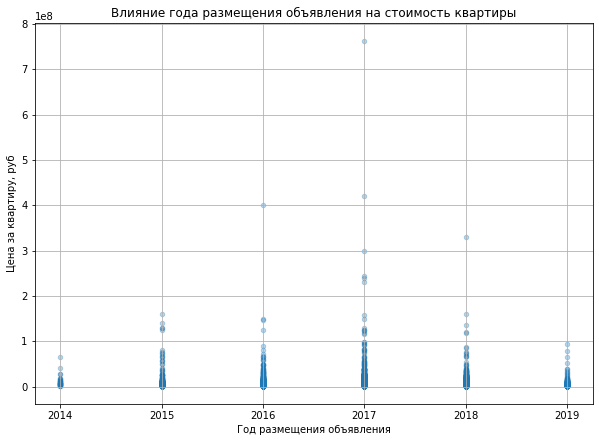

In [51]:
# Изучим зависимость цены от года размещения
# Построим график
plot(data, 'year_exposition', 'last_price', 'scatter', 0.3, True, 0, 0, 0, 'Влияние года размещения объявления на стоимость квартиры', 'Год размещения объявления', 'Цена за квартиру, руб')
# посчитаем корреляцию 
# коэффициент корреляции близок к нулю
# видимо, дело в сложной зависимости: cудя по графику - наиболее благоприятным годом для продажи квартиры был 2017
# в 2014 году наблюдается минимальная цена на квартиры - связано с резким падением курса рубля, наступлением кризиса
# 2014-2017 годах ситуация стала налаживаться, люди адаптировались к таким условиям и соответсвенно цены на квартиры стали повышаться
# После 2017 года рынок недвижимости стал обесцениваться: cвязано это с падением цен за баррель нефти, введение санкций против России
# сокращение кадров повсеместсно, рост цен на жизненно необходимые продукты, высокая ставка по ипотеке 
# Из этого можно сделать вывод, что люди не могут позволить себе купить квартиру из-за нехватки финансов
# Многие люди могут позволить себе только съем жилья, так как нет возможности накопить стартовый капитал для ипотеки

In [52]:
data.groupby('year_exposition')['last_price'].mean()
# Очень странно - 2014 оказывается максимальным значением. 
# Тогда немного добавлю в таком случае к предыдущей ячейке: 
# Кризис начался не с начала года, а после первой половины, поэтому в среднем цена на квартиры выше в этом году.
# А вот влияние 2014 года на последующие года уже заметна невооруженным взглядом...

year_exposition
2014    1.107274e+07
2015    8.182937e+06
2016    6.476538e+06
2017    6.482079e+06
2018    5.677477e+06
2019    6.083214e+06
Name: last_price, dtype: float64

In [53]:
# Выберите 10 населённых пунктов с наибольшим числом объявлений.
# Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
# Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
# Эти данные можно найти по имени в столбце 'locality_name'.

# Посчитаем кол-во объявлений и выберем топ-10 населенных пунктов
top_10_locality = data['locality_name'].value_counts().head(10)
top_10_locality

Санкт-Петербург      11959
посёлок Мурино         449
посёлок Шушары         365
Всеволожск             312
Колпино                275
посёлок Парголово      267
Пушкин                 266
деревня Кудрово        251
Гатчина                231
Выборг                 191
Name: locality_name, dtype: int64

In [54]:
# Посчитаем среднюю цену квадратного метра для каждого из населенных пунктов в топ-10
table_locality_square_meter = data.groupby('locality_name')['price_square_meter'].mean().sort_values(ascending=False)
table_locality_square_meter.head(10)

locality_name
посёлок Лисий Нос    168706.000000
Зеленогорск          113773.650000
Санкт-Петербург      112236.288987
Сестрорецк           101962.362416
Пушкин               101649.936090
Кудрово               97669.409449
посёлок Левашово      96997.000000
деревня Мистолово     96156.777778
деревня Заневка       95454.000000
деревня Кудрово       93142.039841
Name: price_square_meter, dtype: float64

In [55]:
# Самая высокая стоимость за квадратный метр в посёлке Лисий Нос
table_locality_square_meter.head(1)

locality_name
посёлок Лисий Нос    168706.0
Name: price_square_meter, dtype: float64

In [56]:
# Cамая низкая стоимость за квадратный метр в деревне Старополье
table_locality_square_meter.tail(1)

locality_name
деревня Старополье    11206.0
Name: price_square_meter, dtype: float64

nan


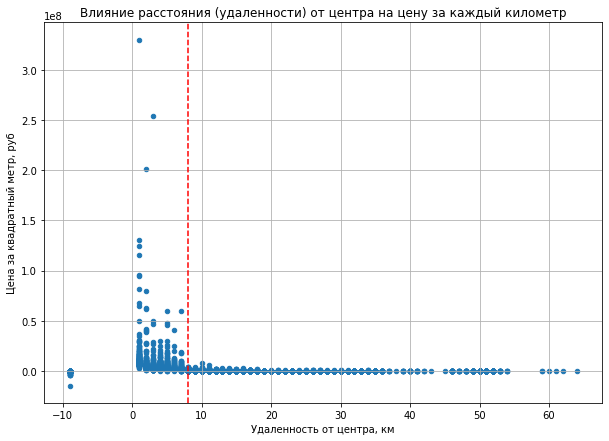

In [57]:
# Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
# Выделите квартиры в Санкт-Петербурге ('locality_name'). 
# Ваша задача — выяснить, какая область входит в центр. 
# Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
# После этого посчитайте среднюю цену для каждого километра. 
# Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
# Определите границу, где график сильно меняется — это и будет центральная зона.

# Создадим столбец с расстоянием до центра в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
# Создадим столбец с ценами за каждый километр
data['price_for_km'] = data['last_price'] / data['cityCenters_nearest_km']
# Построим график, показывающий как цена за каждый километр зависит от удаленности от центра
plot(data, 'cityCenters_nearest_km', 'price_for_km', 'scatter', 1, True, 0, 1, 8, 'Влияние расстояния (удаленности) от центра на цену за каждый километр', 'Удаленность от центра, км', 'Цена за квадратный метр, руб')
# Судя по всему - радиус центральной зоны около 8 км. 

count    7372.000000
mean       65.210874
std        43.505828
min        12.000000
25%        41.000000
50%        54.300000
75%        74.200000
max       900.000000
Name: total_area, dtype: float64


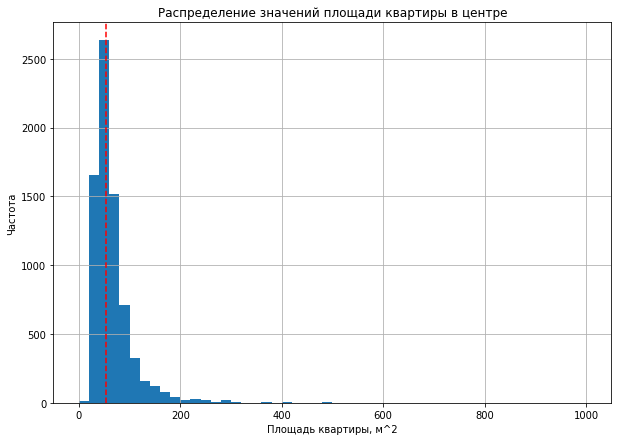

In [58]:
# Выделите сегмент квартир в центре. 
# Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
# Также выделите факторы, которые влияют на стоимость квартиры
# (число комнат, этаж, удалённость от центра, дата размещения объявления). 
# Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

# Выделим сгемент квартир в радиусе 7км 
data_center = data.query('cityCenters_nearest_km <= 8')
# Изучим параметры, пойдем по порядку - площадь
hist(data_center, 'total_area', 50, 0, 1000, 1, 'Распределение значений площади квартиры в центре', 'Площадь квартиры, м^2', 'Частота')
# Среднее и медиана стали выше по сравнению со всей выборкой

count    7.372000e+03
mean     7.444848e+06
std      1.692185e+07
min      4.300000e+05
25%      2.600000e+06
50%      4.100000e+06
75%      7.681498e+06
max      7.630000e+08
Name: last_price, dtype: float64


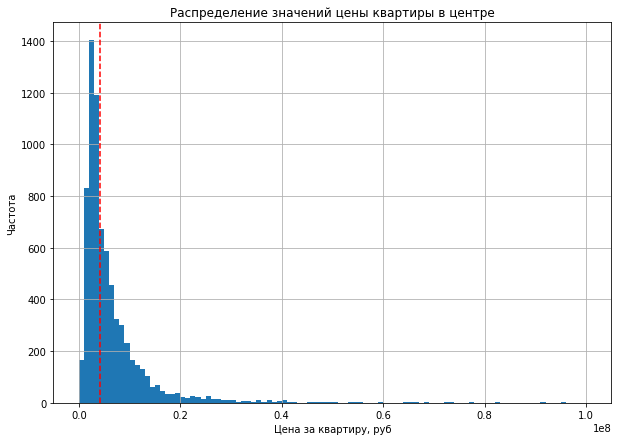

In [59]:
# Изучим параметр - цену
hist(data_center, 'last_price', 100, 0, 1e08, 1, 'Распределение значений цены квартиры в центре', 'Цена за квартиру, руб', 'Частота')
# Как и предполагалось - цены на квартире в центре выше, чем в других зонах

count    7372.000000
mean        2.177971
std         1.190480
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64


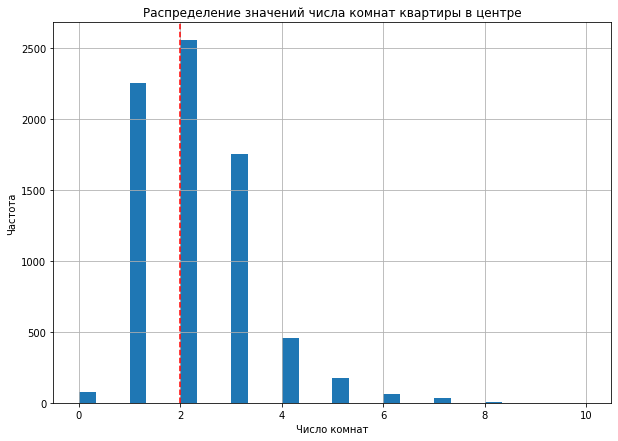

In [60]:
# Изучим параметр - число комнат
hist(data_center, 'rooms', 30, 0, 10, 1, 'Распределение значений числа комнат квартиры в центре', 'Число комнат', 'Частота')
# По соотношению - больше стало многокомнатных квартир (3+ комнат), однако стало меньше "однушек".

count    4125.00000
mean        2.89351
std         1.86503
min         1.20000
25%         2.55000
50%         2.71000
75%         3.00000
max       100.00000
Name: ceiling_height, dtype: float64


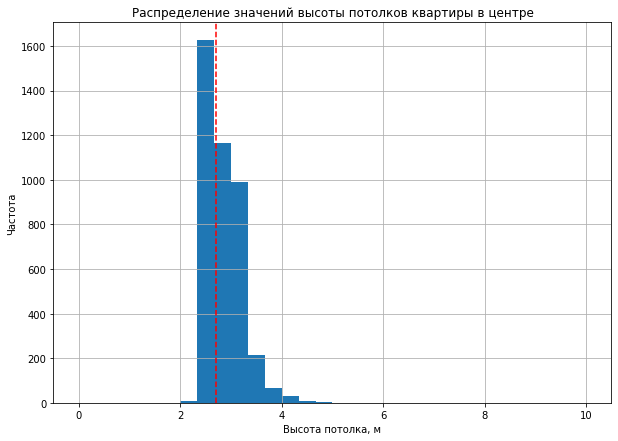

In [61]:
# Изучим параметр - высота потолков
data_ceiling_height = data_center.query('ceiling_height >=0')
hist(data_ceiling_height, 'ceiling_height', 30, 0, 10, 1, 'Распределение значений высоты потолков квартиры в центре', 'Высота потолка, м', 'Частота')
# В центре больше квартир с относительно высокими потолками (цифра ближе 3 метрам)

0.3498294088159013


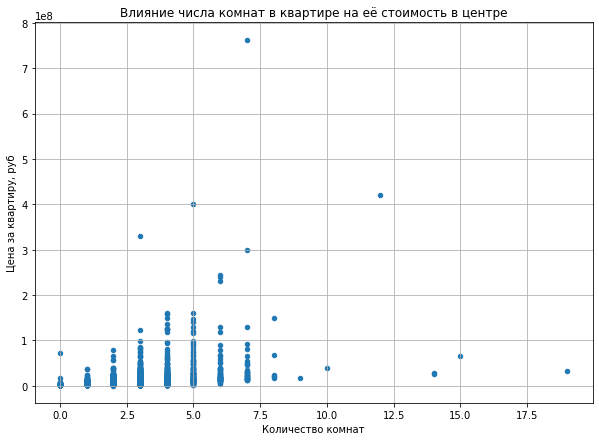

In [62]:
# Проверим факторы, влияющие на стоимость квартиры 
# 1.число комнат 
# Для этого построим график 
plot(data_center, 'rooms', 'last_price', 'scatter', 1, True, 0, 0, 0, 'Влияние числа комнат в квартире на её стоимость в центре', 'Количество комнат', 'Цена за квартиру, руб')
# Посчитаем корреляцию 
# Зависимость похожа на ту, которая была ранее - для всей выборки
# Сначала идет повышение цен с увеличением количества комнат, затем идет падение.
# Вероятно, что связано с влиянием и других факторов на стоимость жилья

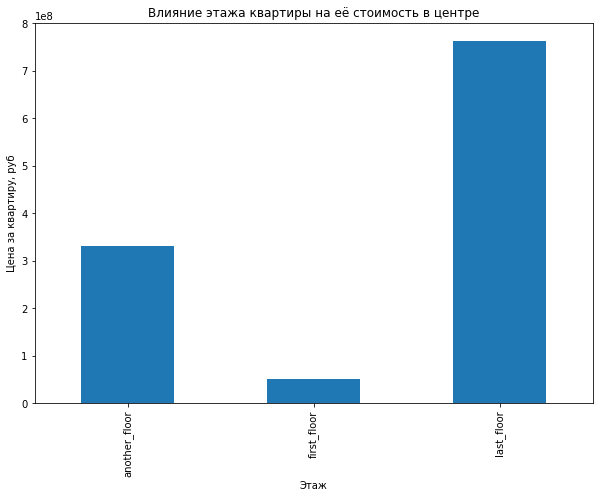

In [63]:
# 2.этаж
# Для этого построим гистограмму
plot(data_center, 'floor_category', 'last_price', 'bar', 1, False, 1, 0, 0, 'Влияние этажа квартиры на её стоимость в центре', 'Этаж', 'Цена за квартиру, руб')

In [64]:
# Посчитаем корреляцию 
data_center['last_price'].corr(data['floor']) 
# Корреляция Пирсона для порядковых переменных не является хорошим вариантом для проверки истинной корреляции 

0.048666325936815545

0.00962721267576872


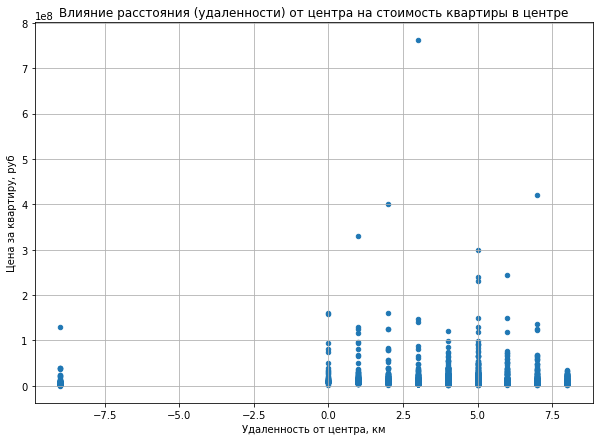

In [65]:
# 3.удалённость от центра
# Для этого построим гистограмму
plot(data_center, 'cityCenters_nearest_km', 'last_price', 'scatter', 1, True, 0, 0, 0, 'Влияние расстояния (удаленности) от центра на стоимость квартиры в центре', 'Удаленность от центра, км', 'Цена за квартиру, руб')
# Интересное наблюдение - в пределах 7 км цена практически не зависит от местоположения
# Вероятно, связано с близким местоположениям к различным достопримечательностям, поэтому нет единой точки в центре, 
# где цена бы была значительно выше, чем в других 
# Однако можно отметить, что цена "нулевого" километра меньше остальных - видимо, дело в повышенном шуме с улицы


In [66]:
data_center.groupby('cityCenters_nearest_km')['last_price'].count()
# Действительно, квартир на нулевом километре действительно меньше всего:) 

cityCenters_nearest_km
-9    4186
 0      57
 1     170
 2     227
 3     366
 4     662
 5     553
 6     331
 7     329
 8     491
Name: last_price, dtype: int64

0.003665108700806614


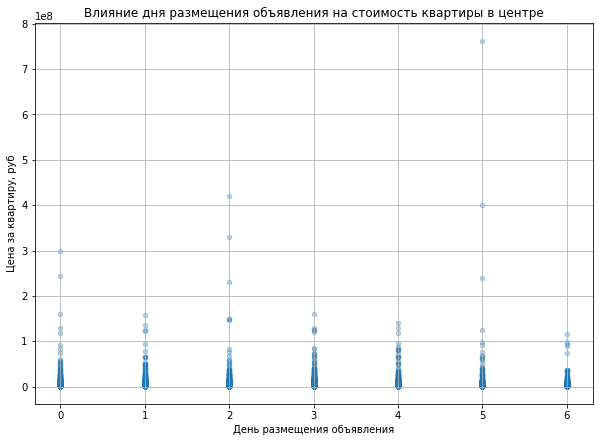

In [67]:
# 3. дата размещения объявления
# В зависимости от дня недели
# Построим график 
plot(data_center, 'weekday_exposition', 'last_price', 'scatter', 0.3, True, 0, 0, 0, 'Влияние дня размещения объявления на стоимость квартиры в центре', 'День размещения объявления', 'Цена за квартиру, руб')
# Вероятно, что причина такого распределения значений такая же как и для всей выборки

In [68]:
data_center.groupby('weekday_exposition')['last_price'].mean()

weekday_exposition
0    7.457739e+06
1    7.009701e+06
2    7.718278e+06
3    7.481543e+06
4    6.941431e+06
5    9.289442e+06
6    6.696423e+06
Name: last_price, dtype: float64

0.004511498468279234


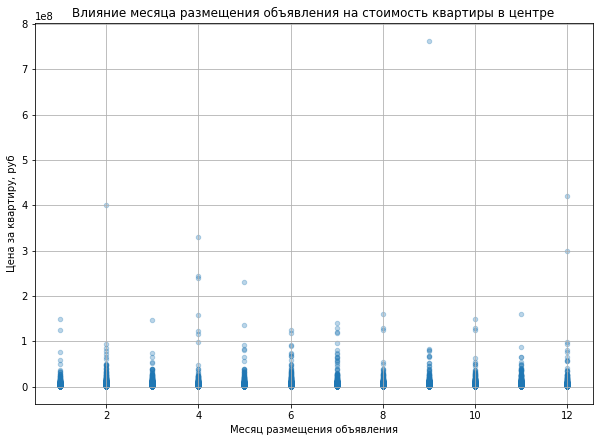

In [69]:
# В зависимости от месяца 
# Построим график 
plot(data_center, 'month_exposition', 'last_price', 'scatter', 0.3, True, 0, 0, 0, 'Влияние месяца размещения объявления на стоимость квартиры в центре', 'Месяц размещения объявления', 'Цена за квартиру, руб')
# Распределение значений аналогично тому, как и по всей зоней

In [70]:
data_center.groupby('month_exposition')['last_price'].mean()

month_exposition
1     6.684504e+06
2     7.324847e+06
3     6.581685e+06
4     8.399326e+06
5     8.220417e+06
6     7.508352e+06
7     8.135281e+06
8     6.769588e+06
9     8.317242e+06
10    6.826527e+06
11    7.199774e+06
12    7.755649e+06
Name: last_price, dtype: float64

-0.044620957223221236


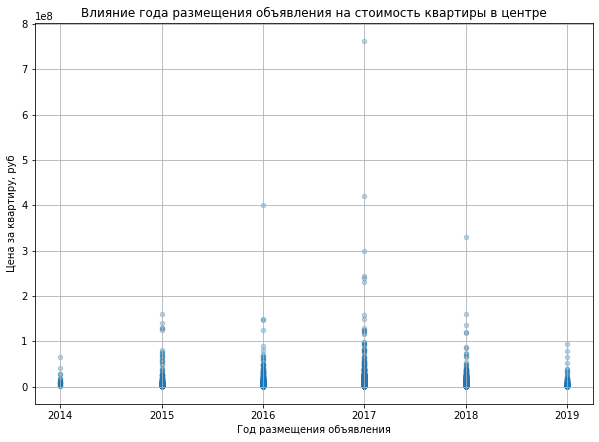

In [71]:
# В зависимости от года размещения
# Построим график 
plot(data_center, 'year_exposition', 'last_price', 'scatter', 0.3, True, 0, 0, 0, 'Влияние года размещения объявления на стоимость квартиры в центре', 'Год размещения объявления', 'Цена за квартиру, руб')
# Причина такого распределения такая же, как и для полной выборки - кризис не пощадил никого.

In [72]:
data_center.groupby('year_exposition')['last_price'].mean()
# Заметно, что в 2019 году появился некий рост цен на квартиры в отличие от всей рассматриваемой зоны

year_exposition
2014    1.433379e+07
2015    1.140195e+07
2016    8.365127e+06
2017    8.121804e+06
2018    5.945771e+06
2019    7.066577e+06
Name: last_price, dtype: float64

In [73]:
# Сравним среднюю высоту во всей зоне и высоту потолко в центре 
mean_ceiling_height  = data_for_ceiling['ceiling_height'].mean()
mean_center_ceiling_height = data_ceiling_height['ceiling_height'].mean()
mean_ceiling_height, mean_center_ceiling_height
# Высота потолков квартир в центральном сегменте все-таки выше, чем по всей зоне

(2.7712870945479637, 2.893510303030303)

**Вывод**
<ul>
    Был проведен исследовательский анализ на основе данных Яндекс.Недвижимости за 2014-2019 года. В ходе исследований было выявлено, что:
    <li> с повышением площади квартиры увеличивается рыночная стоимость жилья </li>
    <li> наименьшой ценой обладают квартиры на первом этаже, максимальной - последним </li>
    <li> чем ближе находится квартира к центру, тем выше цена на жилье </li> 
    <li> цена выше на квартиры с высокими потолками (~3 метра) </li>
    <li> цены зависят от даты размещения объявления (особенно от года, меньше от месяца и незначительно от дня недели) </li> 
    <li> были проанализированы сроки продажи квартир: выявлено, что есть аномально быстрые и медленные продажи, которые в дальнейшем были исключены из датафрейма
</ul>
    

### Шаг 5. Общий вывод

Рыночная стоимость зависит от нескольких параметров одновременно:
<ul>
    <li> площади квартиры </li>
    <li> этажа </li>
    <li> местоположения квартиры (в том числе и удаленности от центра) </li>
    <li> высоту потолков </li>
    <li> даты размещения (особенно от года размещения) </li>
</ul>
Таким образом, учитывая все виды данных (пользовательские и автоматические), можно построить качественную автоматизированную систему, позволяющую отслеживать аномалии и мошенническую деятельность. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод